In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
from keras.utils import to_categorical

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
#from skimage.color import grey2rgb
from skimage.color import rgb2gray

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from keras.models import model_from_json
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
batch_size = 64
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'dataset',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Normal','Parkinson'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

Found 723 images belonging to 2 classes.


100%|██████████| 2/2 [00:00<00:00,  3.81it/s]


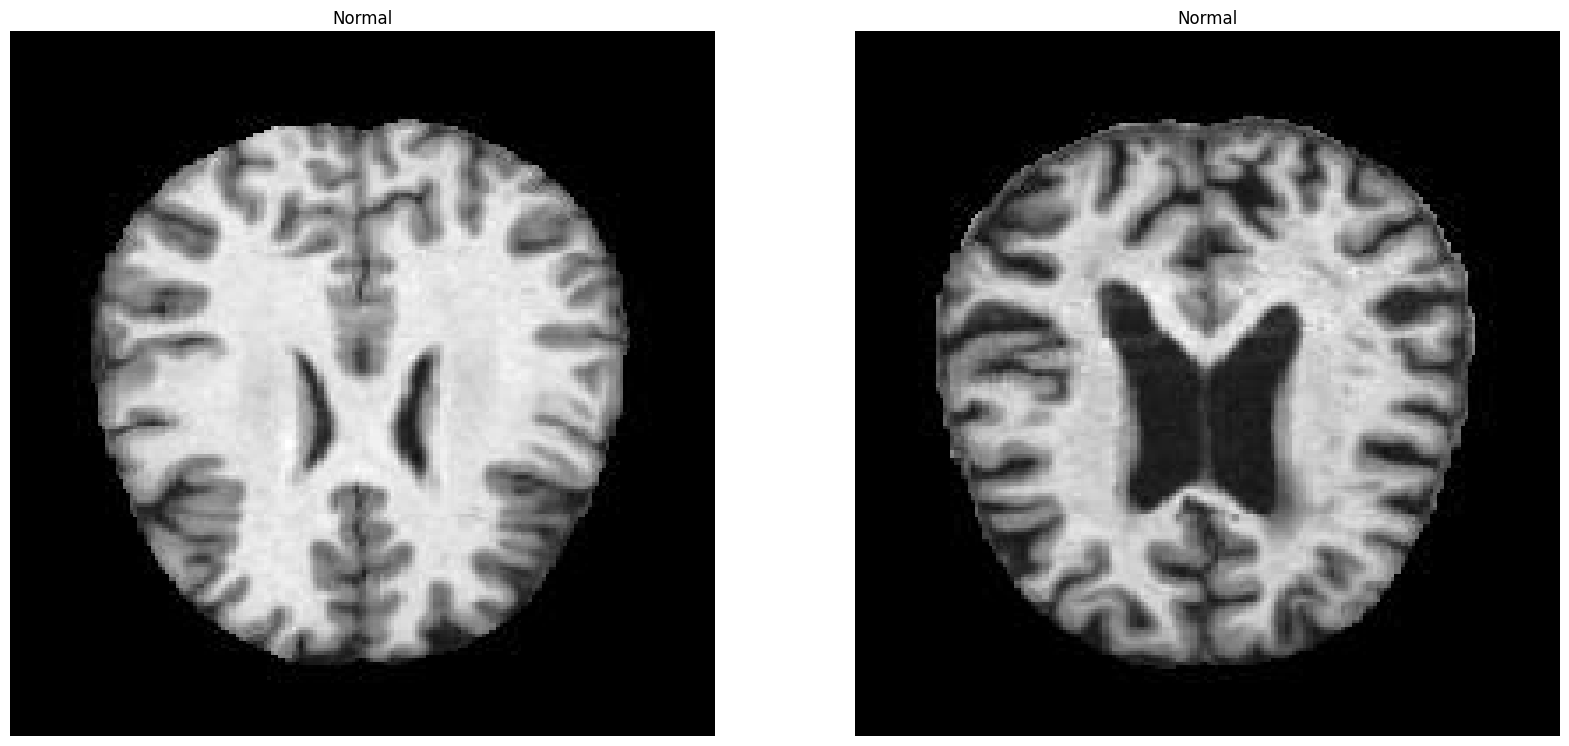

In [3]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,20))

for i in tqdm(range(0,2)):
    rand1 = np.random.randint(len(train_generator))
    rand2 = np.random.randint(50)
    ax[i].imshow(train_generator[rand1][0][rand2])
    ax[i].axis('off')
    a = train_generator[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Normal')
    elif a[1] == 1:
        ax[i].set_title('Parkinson')


In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n
    

In [7]:
n_epochs = 30

history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

model.save('model2.h5')


C:\Users\Admin\AppData\Local\Temp\ipykernel_5864\2664566865.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
11/11 [==============================] - 16s 1s/step - loss: 0.2817 - acc: 0.9196
Epoch 2/30
11/11 [==============================] - 15s 1s/step - loss: 0.2072 - acc: 0.9134
Epoch 3/30
11/11 [==============================] - 15s 1s/step - loss: 0.1885 - acc: 0.9074
Epoch 4/30
11/11 [==============================] - 16s 1s/step - loss: 0.0883 - acc: 0.9484
Epoch 5/30
11/11 [==============================] - 16s 1s/step - loss: 0.1401 - acc: 0.9423
Epoch 6/30
11/11 [==============================] - 15s 1s/step - loss: 0.0786 - acc: 0.9681
Epoch 7/30
11/11 [==============================] - 14s 1s/step - loss: 0.0855 - acc: 0.9681
Epoch 8/30
11/11 [==============================] - 14s 1s/step - loss: 0.0686 - acc: 0.9727
Epoch 9/30
11/11 [==============================] - 14s 1s/step - loss: 0.0720 - acc: 0.9697
Epoch 10/30
11/11 [==============================] - 14s 1s/step - loss: 0.0752 - acc: 0.9681
Epoch 11/30
11/11 [==============================] - 15s 1s/step - lo

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


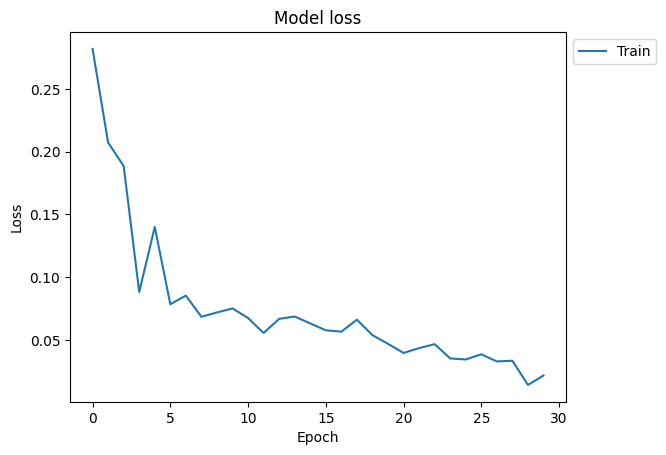

In [8]:

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left', bbox_to_anchor=(1,1))

plt.show()

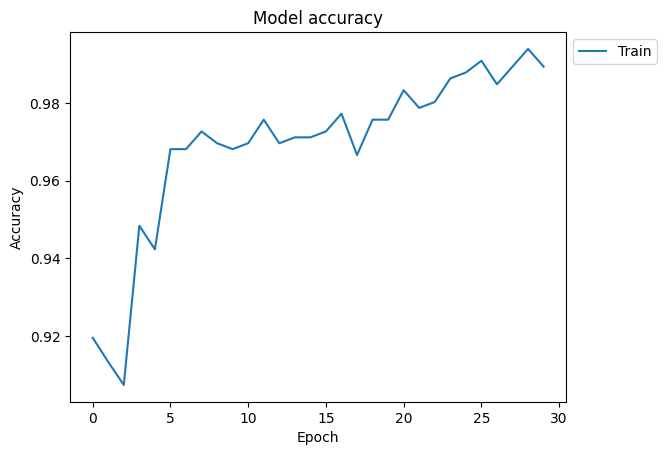

In [9]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [26]:
from flask import Flask, render_template, request
import tensorflow as tf
from keras.preprocessing import image as keras_image
import numpy as np
from PIL import Image
import os

app = Flask(__name__)

# Load the TensorFlow model
classifierLoad = tf.keras.models.load_model('model2.h5')
class_labels = ["Normal", "Parkinson"]

@app.route('/')
def index():
    return render_template('frontpage.html')

@app.route("/risk")
def risk():
    return render_template("risk.html")  

@app.route('/upload', methods=['POST'])
def upload():
    try:
        # Check if a file was uploaded
        if 'image_file' not in request.files:
            return render_template('result.html', error='No file part')

        uploaded_file = request.files['image_file']

        # Check if the file has a valid name and extension
        if uploaded_file.filename == '':
            return render_template('result.html', error='No selected file')

        allowed_extensions = {'jpg', 'jpeg', 'png', 'gif'}
        if not '.' in uploaded_file.filename or uploaded_file.filename.split('.')[-1].lower() not in allowed_extensions:
            return render_template('result.html', error='Invalid file extension')

        # Process the uploaded file
        img = Image.open(uploaded_file)
        img = img.resize((200, 200))
        test_image2 = keras_image.img_to_array(img)
        test_image2 = np.expand_dims(test_image2, axis=0)
        result = classifierLoad.predict(test_image2)

        # Convert the result probabilities to class labels
        if result[0][0] > result[0][1]:
            prediction = "Normal"
        else:
            prediction = "Parkinson"

        # Save the uploaded image
        upload_folder = 'static/uploads'  # You can change this folder path as needed
        os.makedirs(upload_folder, exist_ok=True)
        image_filename = os.path.join(upload_folder, uploaded_file.filename)
        img.save(image_filename)

        return render_template('result.html', prediction=prediction, image_filename=image_filename)
    except Exception as e:
        return render_template('result.html', error=str(e))

 


if __name__ == '__main__':
    app.run(debug=False, port=800)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:800
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:45] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:45] "GET /static/styles.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:45] "GET /static/image4.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:45] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 0s 131ms/step


INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:49] "POST /upload HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:49] "GET /static/image4.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:49] "GET /static/uploads/CONTROL_PD_161.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:50] "GET /risk HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Sep/2023 18:54:50] "GET /static/styles/styles.css HTTP/1.1" 404 -
